In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## 1 Загрузка данных

In [39]:
df = pd.read_csv('ds_learning\\ds_second_phase\\Files\\monthly-boston-armed-robberies-j.csv', names=["Month","Count"], header=0)

In [40]:
df["date"] = pd.to_datetime(df["Month"].str.replace('"', ''), format='%Y-%m')

df.set_index("date", inplace=True)
df.drop("Month", axis=1, inplace=True)

df['log_count'] = np.log(df['Count'])

## 2 ARIMA

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model = ARIMA(df['log_count'], order=(1, 1, 1))
model_fit = model.fit()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
steps = 52
forecast_log = model_fit.forecast(steps=steps)
forecast_count = np.exp(forecast_log)

In [47]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=steps, freq='W-MON')

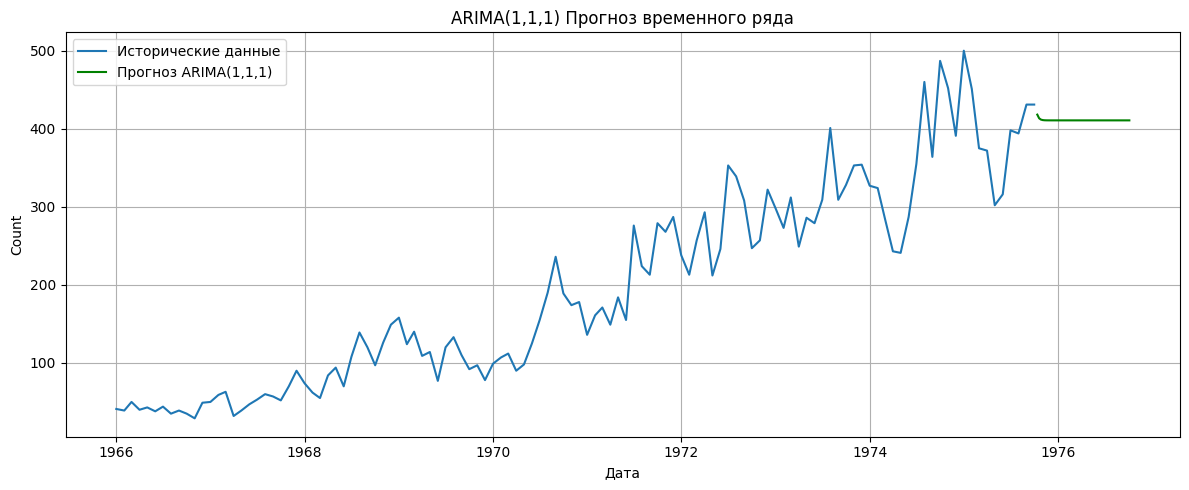

In [48]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Count'], label='Исторические данные')
plt.plot(future_dates, forecast_count, label='Прогноз ARIMA(1,1,1)', color='green')
plt.title('ARIMA(1,1,1) Прогноз временного ряда')
plt.xlabel('Дата')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
model1 = ARIMA(df['log_count'], order=(2, 1, 2))
model1_fit = model1.fit()

forecast_log1 = model1_fit.forecast(steps=steps)
forecast_count1 = np.exp(forecast_log1)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


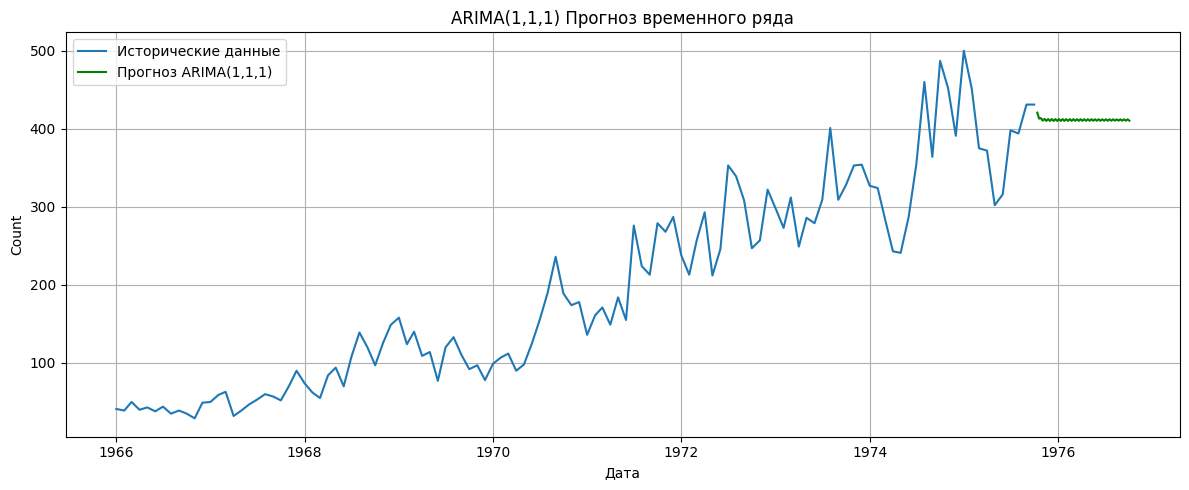

Text(0.5, 1.0, 'Остатки модели')

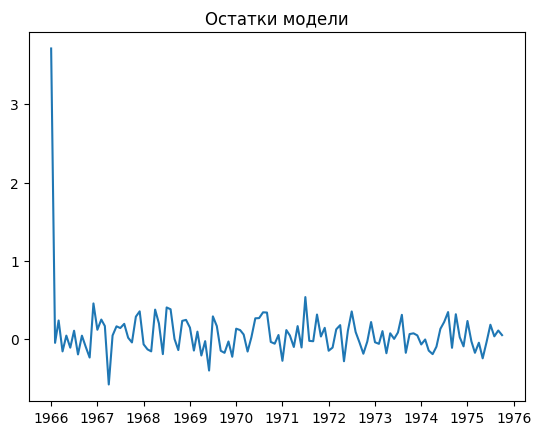

In [73]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Count'], label='Исторические данные')
plt.plot(future_dates, forecast_count1, label='Прогноз ARIMA(1,1,1)', color='green')
plt.title('ARIMA(1,1,1) Прогноз временного ряда')
plt.xlabel('Дата')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
residuals = model1_fit.resid
plt.plot(residuals)
plt.title("Остатки модели")

In [83]:
from statsmodels.tsa.stattools import adfuller
df['diff_log_count'] = df['log_count'].diff().dropna()
data = df['diff_log_count']
res = adfuller(data.dropna())[1]
print(res)

2.3786024417438203e-11


In [84]:
model4 = auto_arima(
    df['diff_log_count'].dropna(),  # Ваш стационарный ряд
    seasonal=False,  # Для несезонных данных
    trace=True      # Вывод подбора параметров
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-39.307, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-34.347, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-37.948, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-41.587, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-42.832, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-41.257, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-41.388, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-43.376, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-41.381, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-39.376, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-47.206, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-42.734, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-47.273, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-49.133, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-37.7

In [ ]:
model = ARIMA(data, order=(1, 0, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         diff_log_count   No. Observations:                  118
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  28.567
Date:                Mon, 04 Aug 2025   AIC                            -49.133
Time:                        16:41:47   BIC                            -38.051
Sample:                    01-01-1966   HQIC                           -44.633
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.004      5.471      0.000       0.014       0.029
ar.L1          0.5608      0.103      5.465      0.000       0.360       0.762
ma.L1         -0.9189      0.057    -16.051      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


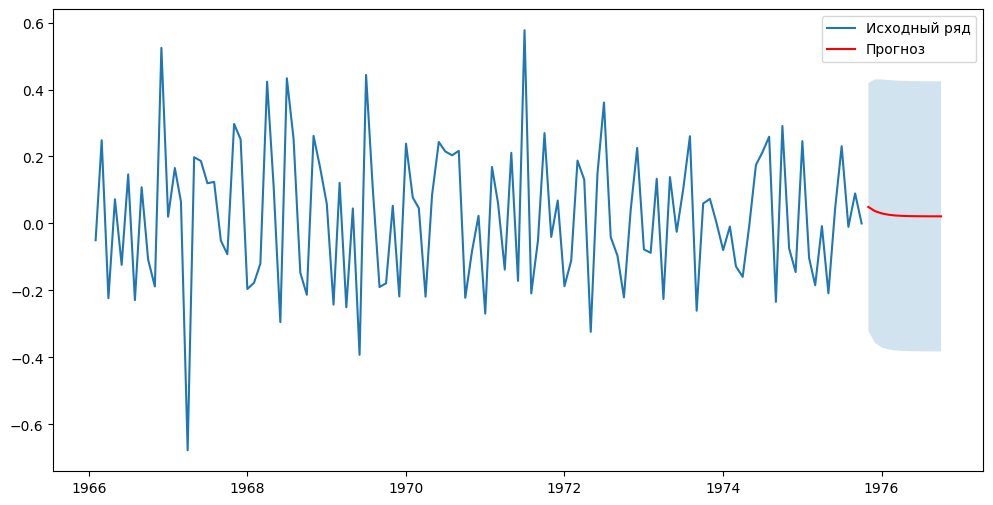

In [86]:
forecast = results.get_forecast(steps=12)  
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(data, label='Исходный ряд')
plt.plot(mean_forecast, label='Прогноз', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)
plt.legend()
plt.show()

Немного сломалась голова в процессе, пока не нашел решения для получения более качественных модели и результата 